In [22]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
import itertools

In [23]:
data=pd.read_csv('air_train&test.csv',index_col=0,encoding='gb2312')
print (data.head())
print (data.shape)
index=data.index
col=data.columns
class_names=np.unique(data.iloc[:,-1])
print (type(data))
print ("空气质量等级类别:",class_names)

           PM2.5  PM10  SO2   CO  NO2  O3_8h  AQI 质量等级
日期                                                    
2013/12/2    109   138   61  2.6   88     11  142   轻度
2013/12/3     64    86   38  1.6   54     45   86    良
2013/12/4     82   101   42  2.0   62     23  109   轻度
2013/12/5     39    56   30  1.2   38     52   56    良
2013/12/6    128   162   48  2.5   78     15  169   中度
(1787, 8)
<class 'pandas.core.frame.DataFrame'>
空气质量等级类别: ['严重' '中度' '优' '良' '轻度' '重度']


In [25]:
enc = LabelEncoder()
enc.fit(data.iloc[:,-1])
print(enc.classes_)

['严重' '中度' '优' '良' '轻度' '重度']


In [27]:
print (data.describe())

             PM2.5         PM10          SO2           CO          NO2  \
count  1787.000000  1787.000000  1787.000000  1787.000000  1787.000000   
mean     69.621153    95.296586    11.994404     1.126021    47.814773   
std      62.851629    70.622543    15.256668     0.907046    23.160085   
min       4.000000     0.000000     2.000000     0.200000     7.000000   
25%      26.000000    45.000000     3.000000     0.600000    32.000000   
50%      52.000000    80.000000     6.000000     0.900000    42.000000   
75%      90.000000   124.000000    14.000000     1.300000    59.000000   
max     477.000000   550.000000   133.000000     8.000000   155.000000   

             O3_8h          AQI  
count  1787.000000  1787.000000  
mean    100.001679   111.306659  
std      63.817485    69.597386  
min       2.000000    21.000000  
25%      52.500000    60.000000  
50%      85.000000    93.000000  
75%     143.000000   145.000000  
max     308.000000   485.000000  


In [28]:
#划分训练集和验证集
data_train, data_test= train_test_split(data,test_size=0.1, random_state=0)
print ("训练集统计描述：\n",data_train.describe().round(2))
print ("验证集统计描述：\n",data_test.describe().round(2))
print ("训练集信息：\n",data_train.iloc[:,-1].value_counts())
print ("验证集信息：\n",data_test.iloc[:,-1].value_counts())


训练集统计描述：
         PM2.5     PM10      SO2       CO      NO2    O3_8h      AQI
count  1608.0  1608.00  1608.00  1608.00  1608.00  1608.00  1608.00
mean     69.1    95.26    11.90     1.12    47.74    99.90   110.62
std      63.2    71.28    15.21     0.91    23.32    63.51    69.94
min       4.0     0.00     2.00     0.20     7.00     2.00    21.00
25%      26.0    45.00     3.00     0.60    32.00    53.00    60.00
50%      51.0    79.00     6.00     0.90    42.00    86.00    92.00
75%      89.0   124.00    14.00     1.30    58.00   142.00   145.00
max     477.0   550.00   133.00     8.00   155.00   308.00   485.00
验证集统计描述：
         PM2.5    PM10     SO2      CO     NO2   O3_8h     AQI
count  179.00  179.00  179.00  179.00  179.00  179.00  179.00
mean    74.32   95.58   12.84    1.17   48.47  100.88  117.44
std     59.61   64.65   15.65    0.85   21.71   66.69   66.33
min      5.00    0.00    2.00    0.30   12.00    5.00   29.00
25%     31.00   46.50    3.00    0.60   32.00   47.00   63

In [29]:
X_train=data_train.iloc[:,0:-2]
X_test=data_test.iloc[:,0:-2]
feature=data_train.iloc[:,0:-2].columns
print (feature)
#分类的训练和验证标签变量数据"质量等级”
y_train=data_train.iloc[:,-1]
y_test=data_test.iloc[:,-1]
#print (X_test)
#print (y_test)
#print(enc.transform(y_test))

Index(['PM2.5', 'PM10', 'SO2', 'CO', 'NO2', 'O3_8h'], dtype='object')


In [30]:
data.drop([u'质量等级'],axis = 1).corr()

,PM2.5,PM10,SO2,CO,NO2,O3_8h,AQI
PM2.5,1.000000,0.853334,0.538169,0.841337,0.787447,-0.111656,0.940226
PM10,0.853334,1.000000,0.526669,0.717788,0.745122,-0.052869,0.848696
SO2,0.538169,0.526669,1.000000,0.622728,0.621791,-0.327056,0.474458
CO,0.841337,0.717788,0.622728,1.000000,0.807794,-0.337648,0.763714
NO2,0.787447,0.745122,0.621791,0.807794,1.000000,-0.357932,0.713377
O3_8h,-0.111656,-0.052869,-0.327056,-0.337648,-0.357932,1.000000,0.124166
AQI,0.940226,0.848696,0.474458,0.763714,0.713377,0.124166,1.000000


In [31]:
'''分类参数选择'''
from sklearn.model_selection import RandomizedSearchCV
criterion=['gini','entropy']
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [32]:
# Create the random grid
random_grid = {'criterion':criterion,
                'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [33]:
#构建模型
clf = RandomForestClassifier()
clf_random = RandomizedSearchCV(estimator=clf, param_distributions=random_grid,n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs=1)


In [34]:
#分类
clf_random.fit(X_train, enc.transform(y_train))
print(enc.transform(y_train))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, criterion=entropy, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, criterion=entropy, bootstrap=False, total=   0.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, criterion=entropy, bootstrap=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, criterion=entropy, bootstrap=False, total=   0.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, criterion=entropy, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, criterion=entropy, bootstrap=False, total=   0.4s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=100, criterion=entropy, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=100, criterion=entropy, bootstrap=False, total=   1.7s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=100, criterion=entropy, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=100, criterion=entropy, bootstrap=False, total=   1.8s
[CV] 

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   37.3s finished


[4 3 3 ... 4 3 0]


In [35]:
##打印出最优参数
print (clf_random.best_params_)


{'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 80, 'criterion': 'gini', 'bootstrap': False}


In [37]:
import itertools
clf=RandomForestClassifier(criterion='entropy',bootstrap=False,max_features='sqrt', max_depth=20,min_samples_split=10, n_estimators=1200,min_samples_leaf=2)

clf.fit(X_train, enc.transform(y_train)) 
y_train_pred=clf.predict(X_train)
y_train_pred=enc.inverse_transform(y_train_pred)
print (y_train)
print (y_train_pred)

日期
2017/7/19     轻度
2018/10/31     良
2014/6/11      良
2014/7/13      良
2014/8/13      良
              ..
2016/3/16     重度
2017/4/3      中度
2018/6/20     轻度
2015/6/14      良
2015/10/17    严重
Name: 质量等级, Length: 1608, dtype: object
['轻度' '良' '良' ... '轻度' '良' '严重']


Index(['PM2.5', 'PM10', 'SO2', 'CO', 'NO2', 'O3_8h'], dtype='object')
[0.37339815 0.21898128 0.01366037 0.059923   0.07104234 0.26299486]


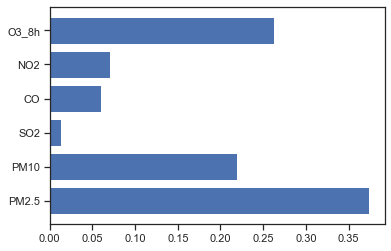

In [38]:
print(feature)
print (clf.feature_importances_)
plt.barh(range(len(clf.feature_importances_)), clf.feature_importances_,tick_label = feature)
plt.show()

In [39]:
##解决中文画图乱码问题
zh_font = matplotlib.font_manager.FontProperties(fname='C:/Windows/Fonts/simhei.ttf')

In [40]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontproperties=zh_font)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes,fontproperties=zh_font )
    plt.yticks(tick_marks, classes,fontproperties=zh_font)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
print ("训练集评估结果：")
report_train=classification_report(y_train, y_train_pred,labels=class_names)
print (report_train)

训练集评估结果：
              precision    recall  f1-score   support

          严重       1.00      1.00      1.00        40
          中度       1.00      1.00      1.00       216
           优       1.00      1.00      1.00       278
           良       1.00      1.00      1.00       612
          轻度       1.00      1.00      1.00       350
          重度       1.00      1.00      1.00       112

    accuracy                           1.00      1608
   macro avg       1.00      1.00      1.00      1608
weighted avg       1.00      1.00      1.00      1608



混淆矩阵
Confusion matrix, without normalization


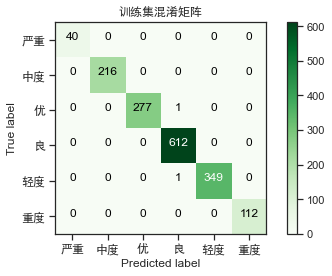

In [41]:
print ('混淆矩阵')
cm=confusion_matrix(y_train, y_train_pred,labels=class_names)
plot_confusion_matrix(cm, classes=class_names,title='训练集混淆矩阵',cmap=plt.cm.Greens)
plt.show()

In [42]:
print ("验证集评估结果：")
y_test_pred=clf.predict(X_test)
y_test_pred=enc.inverse_transform(y_test_pred)
#print (y_test_pred)

report_test=classification_report(y_test, y_test_pred,labels=class_names)
print (report_test)

验证集评估结果：
              precision    recall  f1-score   support

          严重       1.00      1.00      1.00         3
          中度       0.97      0.97      0.97        29
           优       1.00      0.92      0.96        24
           良       0.97      1.00      0.98        61
          轻度       0.98      1.00      0.99        46
          重度       1.00      0.94      0.97        16

    accuracy                           0.98       179
   macro avg       0.99      0.97      0.98       179
weighted avg       0.98      0.98      0.98       179



混淆矩阵
Confusion matrix, without normalization


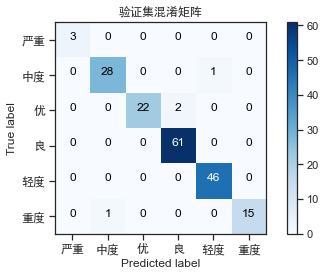

In [43]:
print ('混淆矩阵')
cm_test=confusion_matrix(y_test, y_test_pred,labels=class_names)
plot_confusion_matrix(cm_test, classes=class_names,title='验证集混淆矩阵')
plt.show()

In [45]:

'''预测'''
data_pred=pd.read_csv('air.csv',index_col=0,encoding='gb2312')
y_pred=clf.predict(data_pred.values)
y_pred=enc.inverse_transform(y_pred)

In [46]:
#将分类结果保存在文件中
result_cla=pd.DataFrame(data_pred.index)
result_cla[u'质量等级']=y_pred
result_cla.to_csv('result_cla.txt',encoding='gb2312')
print(y_pred)

['轻度' '良' '轻度' '轻度' '良' '轻度' '轻度' '良' '良' '轻度' '良' '良' '良' '良' '良' '轻度'
 '良' '良' '轻度' '良' '轻度' '良' '良' '良' '良' '良' '轻度' '轻度' '轻度' '良' '轻度' '轻度'
 '轻度' '良' '轻度' '轻度' '轻度' '良' '良' '轻度' '良' '良' '良' '良' '良' '良' '良' '良' '良'
 '轻度' '良' '轻度' '轻度' '良' '轻度' '轻度' '轻度' '良' '轻度' '良' '轻度' '轻度' '轻度' '轻度'
 '轻度' '良' '良' '良' '良' '良' '良' '良' '良' '良' '良' '良' '良' '良' '良' '良' '良' '良'
 '良' '良' '良' '良' '轻度' '良' '良' '良' '良' '良' '良' '良' '良' '良' '良' '良' '优' '良'
 '轻度' '轻度' '良' '轻度' '轻度' '良' '良' '良' '良' '良' '良' '良' '良']
